## Import Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

## Read Dataset

In [2]:
df = pd.read_csv("USA_Housing1.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Explora dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df['Address'].unique()

array(['208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101',
       '188 Johnson Views Suite 079\nLake Kathleen, CA 48958',
       '9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489', ...,
       '4215 Tracy Garden Suite 076\nJoshualand, VA 01707-9165',
       'USS Wallace\nFPO AE 73316',
       '37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595'],
      dtype=object)

In [5]:
df.shape

(5000, 7)

In [6]:
# drop address column
df.drop('Address' , axis = 1 , inplace = True)

In [7]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [8]:
#check for dublication
duplication_value = df.duplicated().sum()
duplication_value

0

In [9]:
# remove duplication 
#df = df.drop_duplicated()

## data Visualization

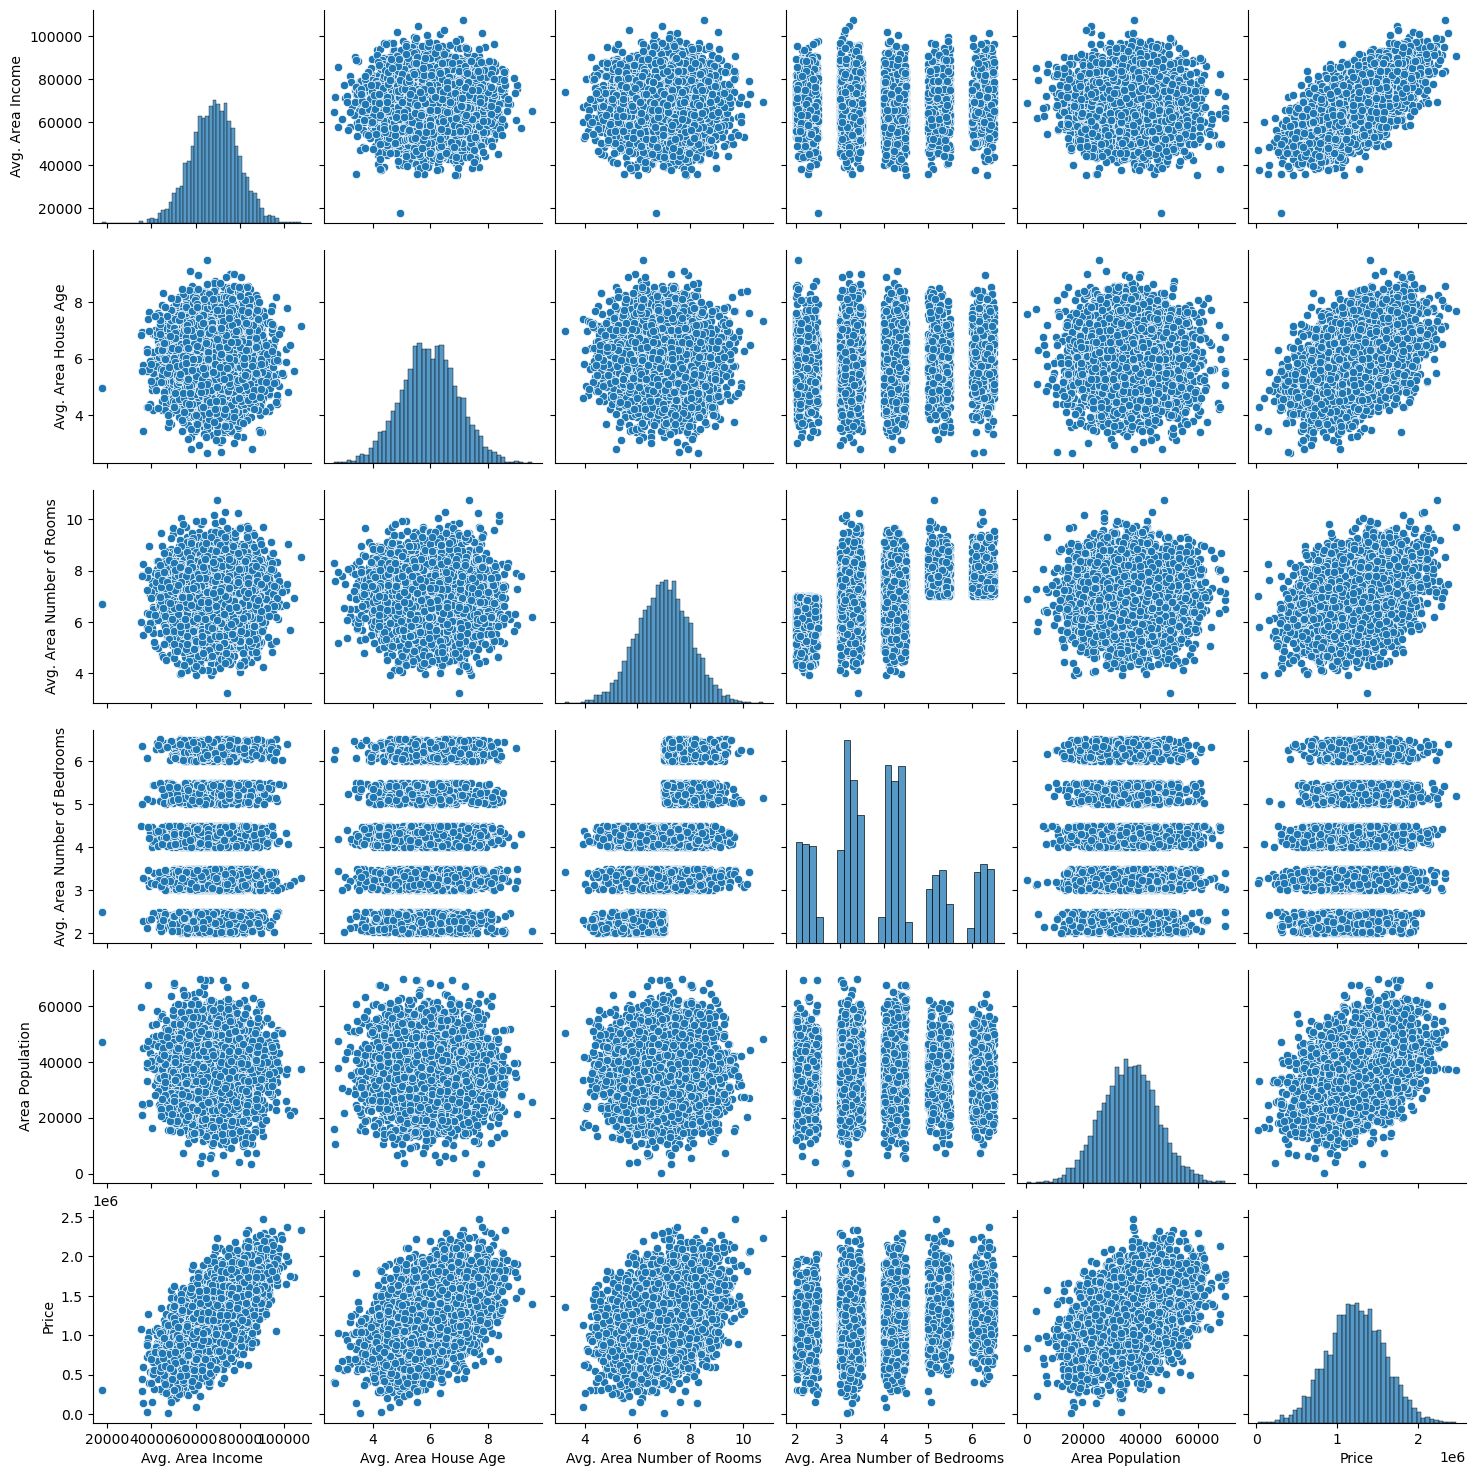

In [10]:
sns.pairplot(df)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


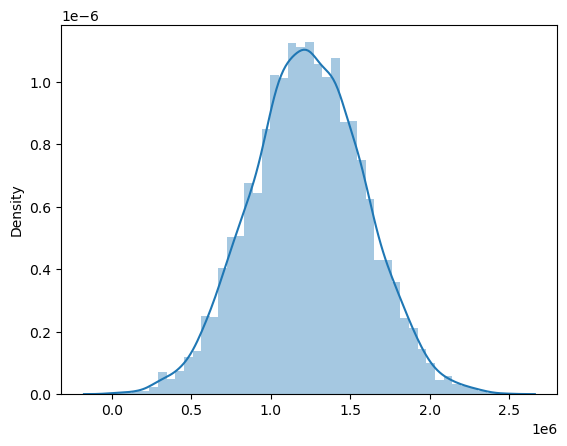

In [11]:
sns.distplot(x = df['Price'])
plt.show()

## data preprocessing 

In [12]:
x = df.drop('Price' , axis = 1)
y = df['Price']

In [13]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [14]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [15]:
# split data into tarin and test
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state = 42)

In [16]:
print("x_traine size = " ,x_train.shape)
print("y_traine size = " ,y_train.shape)
print("x_test size = " ,x_test.shape)
print("y_test size = " ,y_test.shape)

x_traine size =  (4000, 5)
y_traine size =  (4000,)
x_test size =  (1000, 5)
y_test size =  (1000,)


## Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# call LinearRegression model
lr_model  = LinearRegression()

In [19]:
# fit model on train data
lr_model.fit(x_train , y_train)

LinearRegression()

In [20]:
#predict value
y_pred = lr_model.predict(x_test)

In [21]:
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1501,61907.593345,7.017838,6.440256,3.25,43828.947207
2586,57160.202243,6.893260,6.921532,3.13,43467.147035
2653,70190.796445,6.745054,6.662567,2.01,29215.136112
1055,69316.796889,6.300409,7.873576,4.28,24448.211461
705,72991.481649,3.412866,6.494081,2.48,50626.495426
...,...,...,...,...,...
4711,77267.656264,3.939501,8.342808,6.09,22487.712072
2313,75967.135085,5.939370,6.111658,2.32,38897.091584
3214,81013.615294,7.149797,7.239105,5.44,45472.049451
2732,86762.882864,6.530193,5.106962,2.09,47724.581355


In [22]:
print(lr_model.predict([[70190.796445,6.745054,6.662567,2.01,29215.136112]]))
print(lr_model.predict([[72991.481649,3.412866,6.494081,2.48,50626.495426]]))

[1243429.41149806]
[1063320.92658884]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
y_test

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
4711    1.107031e+06
2313    1.405505e+06
3214    1.924156e+06
2732    1.571254e+06
1926    8.831475e+05
Name: Price, Length: 1000, dtype: float64

## Evaluate Model

In [24]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [25]:
print("Mean Absolute Error = " ,mean_absolute_error(y_test , y_pred))

Mean Absolute Error =  80879.0972348916


In [26]:
print("Mean squared Error = " ,mean_squared_error(y_test , y_pred))

Mean squared Error =  10089009300.89364


In [27]:
print("root Mean Absolute Error = " ,np.sqrt(mean_absolute_error(y_test , y_pred)))

root Mean Absolute Error =  284.3925055884764


In [28]:
print("R Squared Error = ", r2_score(y_test , y_pred))

R Squared Error =  0.917997170683436


## Example 2

## Read Data 

In [82]:
df1 =pd.read_csv("insurance.csv")
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Eplore Dataset

In [83]:
df1.shape

(1338, 7)

In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [85]:
df1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [86]:
#check for dublication
duplication_value = df1.duplicated().sum()
duplication_value

1

In [87]:
df1 = df1.drop_duplicates()

In [88]:
df1.duplicated().sum()

0

## Visulization data

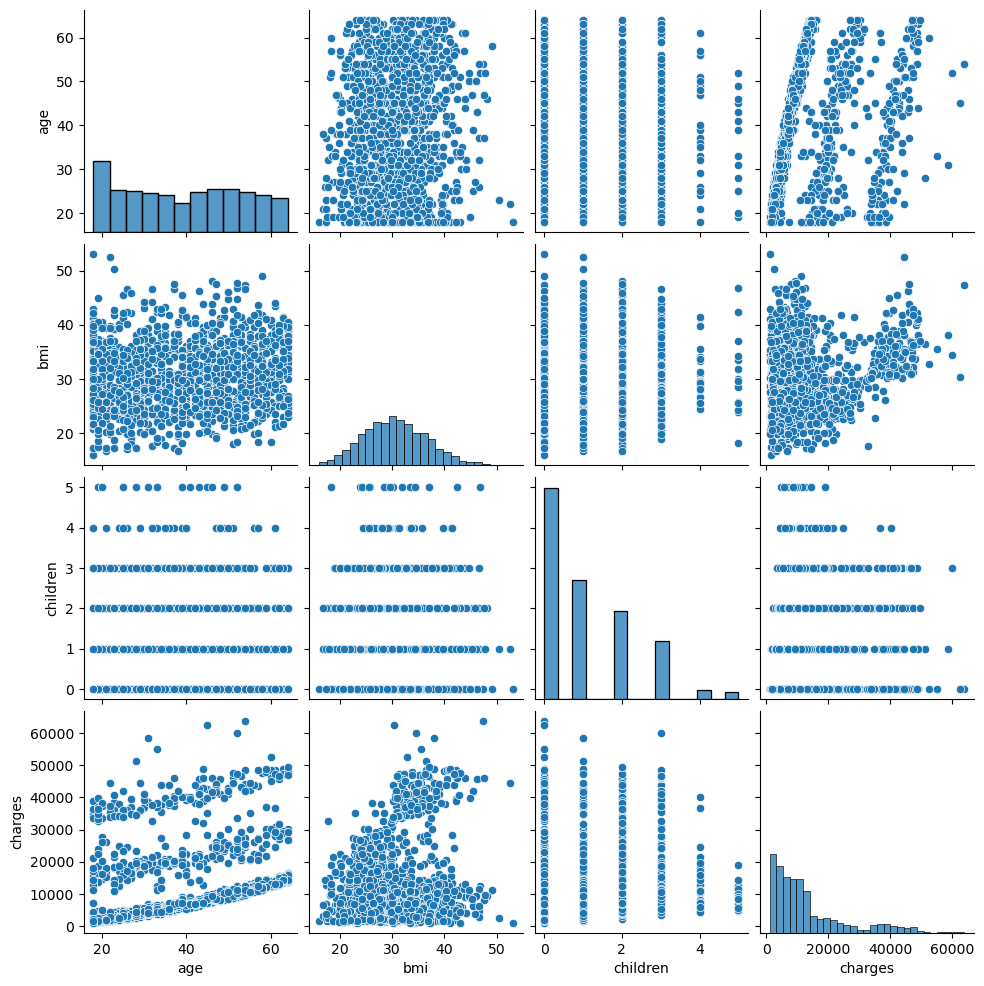

In [89]:
sns.pairplot(df1)
plt.show()

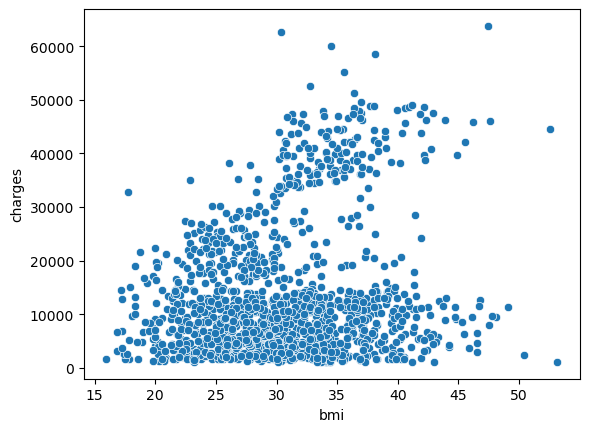

In [90]:
sns.scatterplot(data=df1, x="bmi", y="charges")
plt.show()

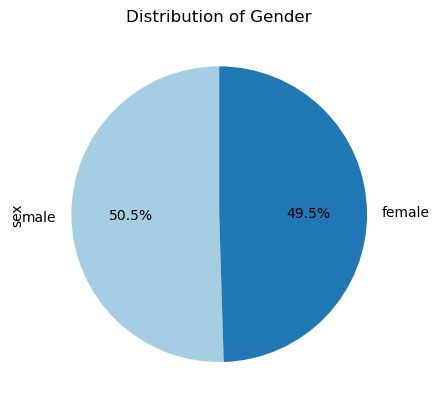

In [91]:
# Plot a pie chart
df1['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title (optional)
plt.title('Distribution of Gender')

# Show the pie chart
plt.show()

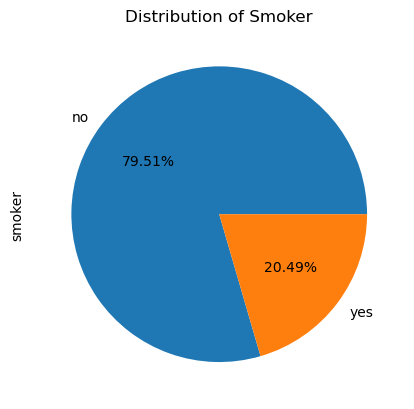

In [92]:
df1['smoker'].value_counts().plot(kind='pie' , autopct='%0.2f%%')
plt.title('Distribution of Smoker')
plt.show()

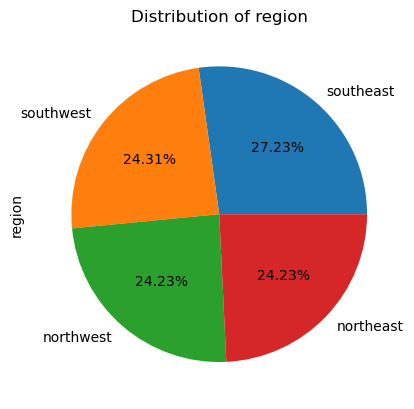

In [93]:
df1['region'].value_counts().plot(kind='pie' , autopct='%0.2f%%')
plt.title('Distribution of region')
plt.show()

## Data PreProcessing

In [94]:
mapper_sex = {"male" : 0 ,"female" : 1}
df1['sex'] = df1['sex'].map(mapper_sex)
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [95]:
mapper_smoker = {"no" : 0 ,"yes" : 1}
df1['smoker'] = df1['smoker'].map(mapper_smoker)
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [96]:
df1['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [97]:
maper_region = {"southwest" : 0 , "northwest" : 1 , "southeast": 2, "northeast":3}
df1['region'] = df1['region'].map(maper_region)
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 115.9 KB


In [99]:
x = df1.drop('charges' , axis = 1)
y = df1['charges']

In [100]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,1
4,32,0,28.880,0,0,1


In [101]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [102]:
# split data into tran and test
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.3 , random_state = 42)

## Linear Regreation Model

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train = scaler.fit_transform(x_test)

In [103]:
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)
y_predect = LR_model.predict(x_test)

In [104]:
x_test

,age,sex,bmi,children,smoker,region
900,49,0,22.515,0,0,3
1064,29,1,25.600,4,0,0
1256,51,1,36.385,3,0,1
298,31,0,34.390,3,1,1
237,31,0,38.390,2,0,2
...,...,...,...,...,...,...
662,32,1,31.540,1,0,3
1103,58,0,36.080,0,0,2
1333,50,0,30.970,3,0,1
332,61,1,31.160,0,0,1


In [105]:
print(LR_model.predict([[29,1,25.600,4,0,0]]))
print(LR_model.predict([[50,0,30.970,3,0,1]]))

[5520.06793218]
[12069.60414922]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [106]:
y_test

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
           ...     
662      5148.55260
1103    11363.28320
1333    10600.54830
332     13429.03540
355     24603.04837
Name: charges, Length: 402, dtype: float64

In [107]:
print("MAE = ", mean_absolute_error(y_test, y_predect))
print("MSE = ", mean_squared_error(y_test, y_predect))
print("RMAE = ", np.sqrt(mean_squared_error(y_test, y_predect)))
print("R Squared = ", r2_score(y_test, y_predect))

MAE =  4189.009662998459
MSE =  39108446.41734598
RMAE =  6253.674633153373
R Squared =  0.7714529557181073


## Example 3

In [108]:
df = pd.read_csv("Ecommerce Customers.txt")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Explore data

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [110]:
df.shape

(500, 8)

In [111]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [112]:
duplication_value = df.duplicated().sum()
duplication_value

0

## Data Visualization

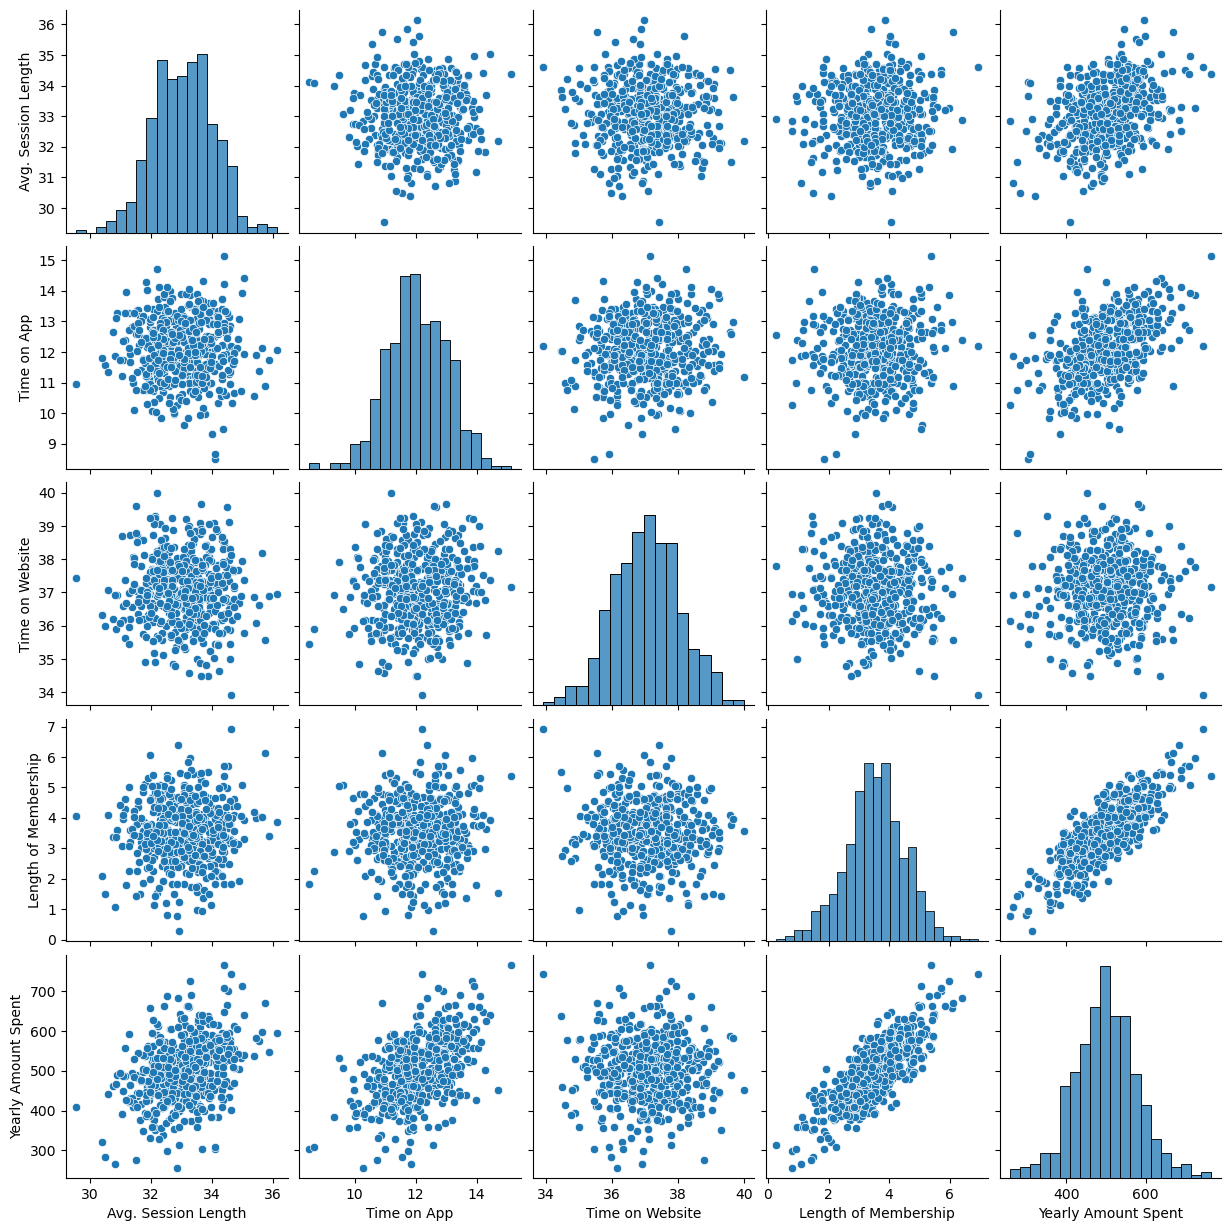

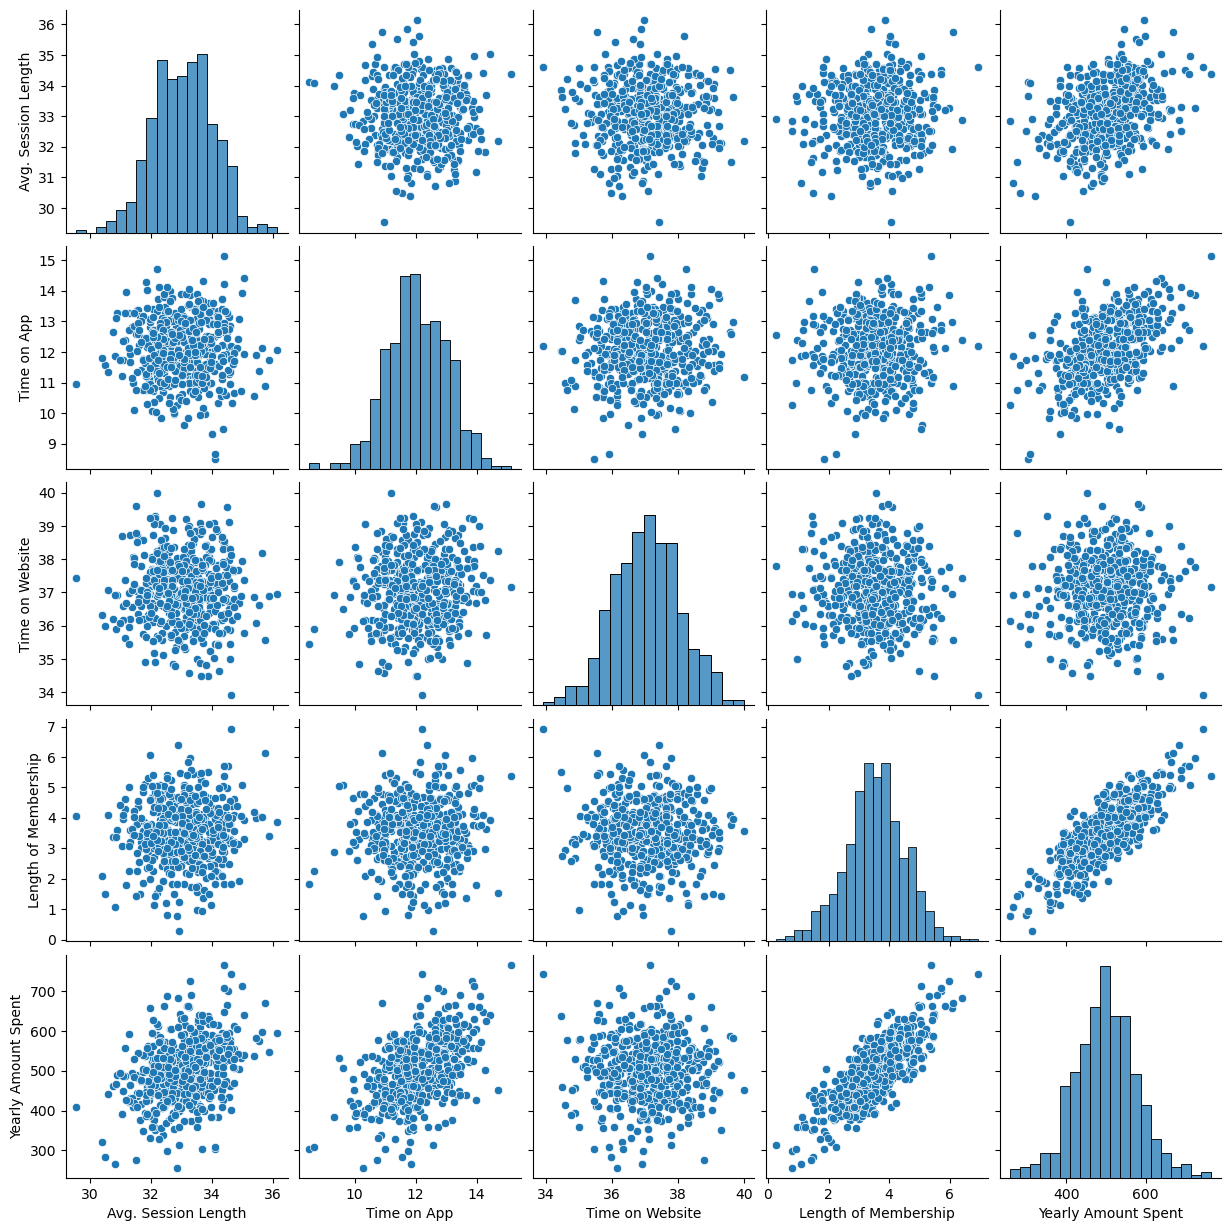

In [116]:
sns.pairplot(df)
plt.show()

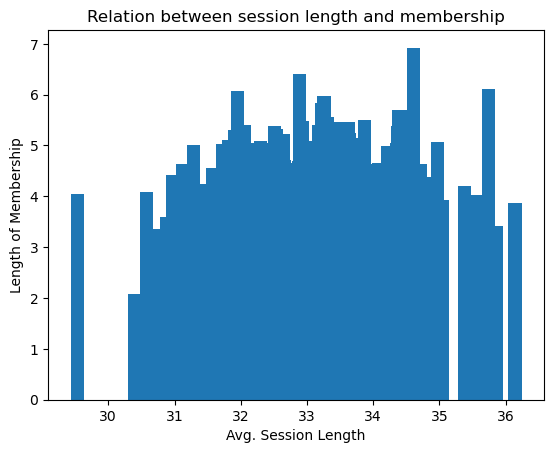

In [122]:
plt.bar(df["Avg. Session Length"] , df["Length of Membership"] , width = 0.2)
plt.xlabel("Avg. Session Length")
plt.ylabel("Length of Membership")
plt.title("Relation between session length and membership")
plt.show()

## Data Preprocessing

In [127]:
column  = ['Email' , 'Address' , 'Avatar']
df.drop(column , axis = 1 , inplace = True)
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [131]:
x = df.drop('Yearly Amount Spent', axis = 1)
y = df['Yearly Amount Spent']

In [132]:
x.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [133]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [136]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 20)

In [138]:
lr_model = LinearRegression()

In [139]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [140]:
y_pred = lr_model.predict(x_test)

In [141]:
y_pred

array([466.01551414, 401.85363454, 393.81409768, 347.03505143,
       423.76529546, 560.77859192, 512.50093472, 379.8658969 ,
       572.21012862, 569.39883941, 610.35724329, 482.52904164,
       532.75190638, 523.9656358 , 466.89542938, 380.26084371,
       376.90407779, 499.47366827, 584.00891263, 411.61792933,
       459.61935164, 531.72401985, 590.02067722, 682.98302134,
       500.51145128, 459.61555124, 606.50464004, 407.37606522,
       571.01452059, 470.78722017, 615.31497467, 414.29363542,
       479.10000436, 531.60173419, 500.46786402, 553.62668909,
       452.5068921 , 508.99850569, 505.60930221, 543.81783132,
       494.05918441, 532.29857381, 525.88567599, 441.63931918,
       563.71650458, 436.76282757, 478.35915792, 527.8770233 ,
       428.12105823, 481.27657632, 575.09762522, 505.21292149,
       508.40078313, 619.32526054, 657.64488503, 556.82680472,
       480.35190694, 426.75272291, 646.38507938, 519.93760566,
       518.06070461, 416.98844094, 562.1148075 , 435.15

In [142]:
print("MAE = ", mean_absolute_error(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R Squared = ", r2_score(y_test, y_pred))

MAE =  8.320231856760417
MSE =  110.24006594346578
RMSE =  10.499526939032338
R Squared =  0.9798694395042845
